In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Чтение датафрейма
df = pd.read_csv('task_for_a_prod_analytics_trainee_part_c.csv')
df.head()

,hashed_user_id,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,...,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
0,$1VAQ97BmCCZc,26,male,481,476,361,177,lge,LG-M250,7,...,1,0,501,0,55,0,0,0,0,0
1,$1v/FKogrWnz2,26,female,115,72,419,0,Apple,iPhone 7,7,...,23,0,0,0,0,0,0,0,0,0
2,$1eoMEtyVB3XM,26,female,297,317,2681,0,Apple,iPhone 11 Pro Max,7,...,33,0,0,0,0,0,0,0,0,0
3,$12ZhvNRMpcZU,20,male,147,130,216,0,samsung,SM-G970F,7,...,1,0,5085,101,2371,0,0,0,0,0
4,$1mD0tDgB13tk,39,male,138,311,51,33,NaN,NaN,7,...,3,0,1301,0,0,0,0,0,0,0


### Часть 1. Общая информация о датасете

In [3]:
# типы данных, пропущенные значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125893 entries, 0 to 125892
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   hashed_user_id            125893 non-null  object
 1   user_age                  125893 non-null  int64 
 2   user_sex                  125893 non-null  object
 3   user_friends              125893 non-null  int64 
 4   user_communities_count    125893 non-null  int64 
 5   user_fans_count           125893 non-null  int64 
 6   user_subscriptions_count  125893 non-null  int64 
 7   device_brand              107049 non-null  object
 8   device_model              106748 non-null  object
 9   days_in_vk_1_week         125893 non-null  int64 
 10  days_in_vk_2_weeks        125893 non-null  int64 
 11  days_in_vk_4_weeks        125893 non-null  int64 
 12  days_in_vk_8_weeks        125893 non-null  int64 
 13  messaging_total           125893 non-null  int64 
 14  call

In [4]:
# Основные описательные статистики числовых переменных
df.describe()

,user_age,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
count,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.00000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000
mean,34.459168,222.997315,232.251865,193.345929,37.119109,6.671960,13.246829,26.35272,52.394947,53.359043,0.029350,4413.406480,625.537671,1112.688871,202.838816,296.016339,3.784261,58.317015,7.910329
std,20.505505,566.932642,386.763992,737.468913,226.131946,0.978889,2.063192,4.28400,8.952063,447.576857,0.278273,6015.906566,1837.310044,1968.557926,451.986990,1255.317444,56.554741,417.691275,62.912777
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,48.000000,55.000000,24.000000,1.000000,7.000000,14.000000,27.00000,54.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,110.000000,119.000000,88.000000,4.000000,7.000000,14.000000,28.00000,56.000000,7.000000,0.000000,2331.000000,0.000000,146.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,216.000000,254.000000,198.000000,16.000000,7.000000,14.000000,28.00000,56.000000,49.000000,0.000000,6299.000000,300.000000,1512.000000,229.000000,97.000000,0.000000,0.000000,0.000000
max,120.000000,10000.000000,5000.000000,61271.000000,9115.000000,7.000000,14.000000,28.00000,56.000000,126172.000000,18.000000,265774.000000,80450.000000,33837.000000,21936.000000,49692.000000,5059.000000,30370.000000,5777.000000


In [5]:
# Основные описательные статистики категориальных переменных
df.describe(include=np.object)

,hashed_user_id,user_sex,device_brand,device_model
count,125893,125893,107049,106748
unique,125659,3,182,2253
top,$1NaKzSOKcfoI,male,Apple,iPhone 11
freq,2,80468,40272,7349


#### Выводы по части 1.

1. В датасете содержится информация о **125 659** уникальных пользователях социальной сети ВКонтакте: об их поле и возрасте, о количестве друзей, сообществ, подписок, о времени, проверенным в социальной сети.

2. В датасете присутствует **повторяющиеся id пользователей** (возможно, из-за использования различных устройств) - это необходимо учитывать при дальнейшем анализе

3. Есть **пропущенные значения** в столбцах device_brand и device_model

4. В датафрейме **3 значения пола** пользователя: нужно будет выяснить, какие категории пола встречаются.

5. Минимальный и максимальный **возраст** пользователя получился **нереалистичным** - 0 лет и 120 лет. Нужно будет отфильтровать эти значения, чтобы более точно определить средний и медианный возраста

6. Для входа в социальную сеть используется устройства **182 различных производителей**, наиболее популярный - **Apple**

7. Данные о времени, проведенном пользователем в социальной сети, имеют большую дисперсию и сильное смещение среднего от медианы. Это говорит об **асимметрии распределения и большом разбросе данных**

8. Также большой разброс (и, возможно, выбросы) имеют значения, характеризующие аккаунты пользователей: количество друзей, подписок и т.д.

### Часть 2. Пользователи ВКонтакте

В данном разделе попробуем понять, какими характеристиками обладают пользователи социальной сети. Мужчины это или женщины, сколько им лет, какими устройствами для входа в ВК они пользуются

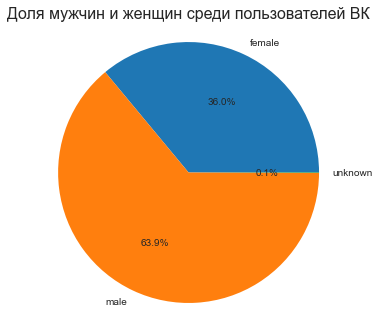

In [6]:
# Три группы пола по уникальным пользователям
sex = df.drop_duplicates('hashed_user_id').groupby('user_sex')[['hashed_user_id']].nunique()

plt.pie(sex['hashed_user_id'], labels=sex.index, autopct='%1.1f%%', radius=1.5)
plt.title('Доля мужчин и женщин среди пользователей ВК', pad=45, fontsize=16);

In [7]:
# Статистики возраста пользователей, взятого в более "реалистичных" рамках: от 7 до 90 лет
df_correct_age = df.drop_duplicates('hashed_user_id')[(df.user_age <= 90) & (df.user_age >= 7)]
df_correct_age.user_age.describe()

count    117969.000000
mean         33.071832
std          14.487815
min          13.000000
25%          23.000000
50%          28.000000
75%          39.000000
max          90.000000
Name: user_age, dtype: float64

In [8]:
# Введем интервальную оценку возраста
# Возьмем 4 следующих интервала:

# 1 - до 18 -- группа детей и подростков
# 2 - 18-30 -- группа молодежи
# 3 - 30-50 -- группа людей среднего возраста
# 4 - старше 50 -- группа людей предпенсионного, пенсионного возраста

bins = np.array([0.0, 18.0, 30.0, 50.0])
df['age_interval'] = np.digitize(df['user_age'], bins)
df_correct_age['age_interval'] = np.digitize(df_correct_age['user_age'], bins)
df_correct_age.head()

,hashed_user_id,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,...,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story,age_interval
0,$1VAQ97BmCCZc,26,male,481,476,361,177,lge,LG-M250,7,...,0,501,0,55,0,0,0,0,0,2
1,$1v/FKogrWnz2,26,female,115,72,419,0,Apple,iPhone 7,7,...,0,0,0,0,0,0,0,0,0,2
2,$1eoMEtyVB3XM,26,female,297,317,2681,0,Apple,iPhone 11 Pro Max,7,...,0,0,0,0,0,0,0,0,0,2
3,$12ZhvNRMpcZU,20,male,147,130,216,0,samsung,SM-G970F,7,...,0,5085,101,2371,0,0,0,0,0,2
4,$1mD0tDgB13tk,39,male,138,311,51,33,NaN,NaN,7,...,0,1301,0,0,0,0,0,0,0,3


In [9]:
# Посмотрим на абсолютные и относительные размеры получившихся групп
age_groups = df_correct_age.groupby('age_interval')[['hashed_user_id']].count()
age_groups['percentage'] = age_groups['hashed_user_id'] / len(df_correct_age) * 100
age_groups

,hashed_user_id,percentage
age_interval,,
1,3233,2.740550
2,61848,52.427333
3,34457,29.208521
4,18431,15.623596


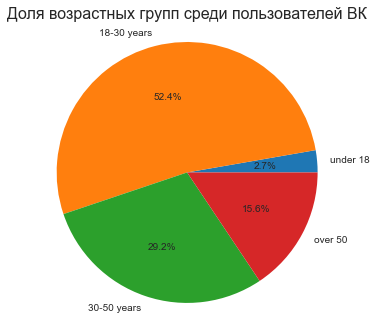

In [10]:
# возрастные группы на графике
age_groups_labels = ['under 18', '18-30 years', '30-50 years', 'over 50']
plt.pie(age_groups['hashed_user_id'], labels=age_groups_labels, autopct='%1.1f%%', radius=1.5)
plt.title('Доля возрастных групп среди пользователей ВК', pad=45, fontsize=16);

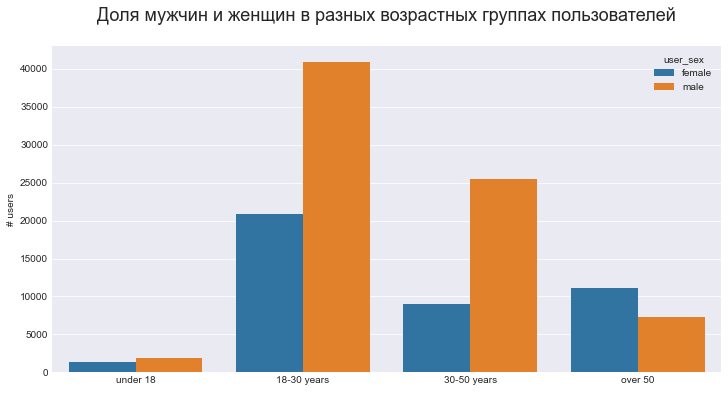

In [11]:
# Посмотрим, как представлены мужчины и женщины в разных возрастных группах

age_groups2 = df_correct_age.groupby(['user_sex', 'age_interval'])[['hashed_user_id']].count().reset_index()
# Убираем пол unknown
age_groups2 = age_groups2[(age_groups2['user_sex'] == 'female') | (age_groups2['user_sex'] == 'male')]

# Строим график

# Задаем размеры
fig, ax = plt.subplots(figsize=(12,6))

# Парамерты для переименования оси х
labels = [0, 1, 2, 3]
age_groups_labels = ['under 18', '18-30 years', '30-50 years', 'over 50']

# График, параметры, название
sns.barplot(data=age_groups2, x=age_groups2['age_interval'], y='hashed_user_id', hue='user_sex', ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel('# users')
plt.xticks(labels, age_groups_labels)
plt.title('Доля мужчин и женщин в разных возрастных группах пользователей', pad=25, fontsize=18);

In [12]:
# 10 самых популярных девайсов пользователей (по производителям девайсов)
# Используем датасет с повторяющимися user_id, так как у одного и того же пользователя может быть несколько 
# девайсов
df.groupby(['device_brand'])['hashed_user_id'].count().nlargest(10)

device_brand
Apple      40272
samsung    18133
HONOR      11814
xiaomi      7478
Xiaomi      6804
Redmi       6466
HUAWEI      5549
realme      1085
POCO         920
asus         732
Name: hashed_user_id, dtype: int64

In [13]:
# ! Информация по производителям девайсов не очень корректная, так как некоторые производители дублируются. 
# Так, например, xiaomi, Xiaomi, Redmi, POCO - это один и тот же производитель, 
# или HONOR - это суббренд HUAWEI. Это касается и брендов OnePlus, OPPO и realme.

# Это видно и по самим устройствам. Например, некоторые устройства Redmi отмечены как xiaomi, так как это 
# один и тот же бренд
df[df['device_brand'] == 'xiaomi'][['device_brand', 'device_model']].head(5)

,device_brand,device_model
16,xiaomi,Redmi Note 8T
23,xiaomi,Redmi Note 7
67,xiaomi,Redmi 6
83,xiaomi,Redmi Note 5
92,xiaomi,Redmi Note 8T


In [14]:
# Поэтому можно объединить перечисленные бренды и посмотреть на топ-5 получившихся производителей

df_devices = df.copy()
# Объединение подразделений Xiaomi
df_devices['device_brand'] = np.where(
    (df_devices['device_brand'] != 'xiaomi') & (
        df_devices['device_brand'] != 'Redmi') & (
        df_devices['device_brand'] != 'POCO'), df_devices['device_brand'], 'Xiaomi')
# Объединение подразделений HUAWEI
df_devices['device_brand'] = np.where(
    df_devices['device_brand'] != 'HONOR', df_devices['device_brand'], 'HUAWEI')
# Объединение подразделений OPPO
df_devices['device_brand'] = np.where(
    (df_devices['device_brand'] != 'OnePlus') & (
        df_devices['device_brand'] != 'realme'), df_devices['device_brand'], 'OPPO')

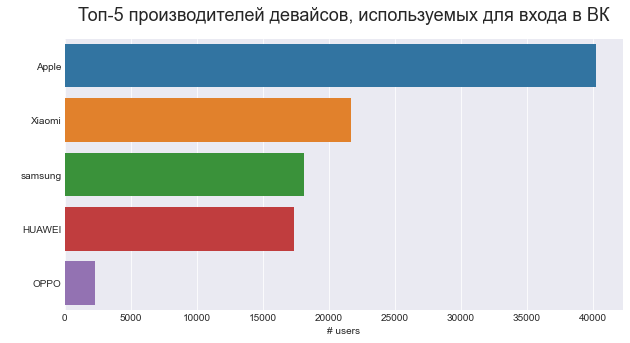

In [15]:
top_5_device_pr = df_devices.groupby(['device_brand'])['hashed_user_id'].count().nlargest(5)

# Размеры графика
fig, ax = plt.subplots(figsize=(10, 5))
# График и параметры осей
sns.barplot(top_5_device_pr, x='device_brand', y=top_5_device_pr.index)
ax.set_xlabel('# users')
ax.set_ylabel(' ')
# Название
plt.title('Топ-5 производителей девайсов, используемых для входа в ВК', pad=18, fontsize=18);

In [16]:
# Посмотрим на конкретные модели девайсов, так как по ним косвенно можно судить о доходах пользователей
# Отсортируем по возрастным группам и выведем топ-10 устройств для каждой группы

intervals = [1, 2, 3, 4]
for group in intervals:
    print('---------------------------------')
    print('group', group)
    print(df_devices[df_devices['age_interval'] == group].groupby(['device_brand', 'device_model'])[
        'hashed_user_id'].count().sort_values(ascending=False).head(10))

---------------------------------
group 1
device_brand  device_model    
Apple         iPhone 11           273
              iPhone 7            236
              iPhone XR           168
              iPhone SE (GSM)     135
              iPhone 6s           129
Xiaomi        Redmi Note 7        123
              Redmi Note 8 Pro    101
Apple         iPhone 8             99
samsung       SM-A505FN            92
              SM-A515F             86
Name: hashed_user_id, dtype: int64
---------------------------------
group 2
device_brand  device_model    
Apple         iPhone 11           5783
              iPhone XR           3612
              iPhone 7            3266
              iPhone 8            1749
              iPhone 6s           1432
              iPhone X GSM        1376
              iPhone SE (GSM)     1369
              iPhone 8 Plus       1213
Xiaomi        Redmi Note 8 Pro    1172
Apple         iPhone 7 Plus       1045
Name: hashed_user_id, dtype: int64
--------------

#### Выводы по части 2.

1. В датасете бОльшую долю пользователей составляют **мужчины (64%)**. Третья категория пола, которая была обнаружена в первой части - пользователи, которые не указали свой пол. Однако доля таких пользователей крайне мала - всего 0,1%, поэтому они не должны исказить будущие результаты.

2. Наибольшая возрастная группа - **молодежь от 18 до 30 лет**. Их доля в датасете равна **52,4%**. Меньше всего доля пользователей младше 18 лет - всего 2,7%.

3. Соотношение мужчин и женщин в возрастных группах **не пропорционально** соотношению в датасете в целом (64% против 36%). Так, мужчины действительно преобладают в группах детей и подростков, молодежи и людей среднего возраста, однако **в группе людей старше 50 лет выше доля женщин** (что частично должно объясняться преобладанием женщин в данной возрастной категории в обществе в целом). В группе детей и подростков лишь небольшой перевес мужчин, но в группах молодых и людей среднего возраста перевес существенен: вдвое и больше.

4. Наиболее популярными девайсами среди пользователей является техника **Apple**. Их доля примерно вдвое превышает доли следующих по популярности производителей - **Samsung, Xiaomi, Samsung, Huawei**. Также при дальнейшем анализе данной метрики необходимо иметь в виду **неточности в данных**, а именно необходимость совместного рассмотрения брендов и суббрендов.

5. Что касается самих моделей гаджетов, наиболее популярными являются смартфоны **iPhone 11**. При этом наблюдается **закономерность в распределении долей конкретных моделей в разных возрастных группах**. Так, бОльшая часть представленных iPhone'ов относится к дорогому сегменту, и преобладание дорогих телефонов мы видим в группе молодежи (18-30 лет). Большинство Andriod-телефонов, попавших в топ-10 девайсов по группам, относятся к бюджетным смартфонам, и они встречаются чаще в возрастных группах до 18 и старше 30 лет.

### Часть 3. Характеристики аккаунтов пользователей

В данной части мы проанализируем характеристики, связанные с аккаунтами пользователей: количество друзей,  сообществ, подписок, а также количество подписчиков пользователя.

In [17]:
# Фильтр по нужным характеристикам
page_info = ['hashed_user_id', 'user_sex', 'user_age', 'age_interval', 'user_friends', 'user_communities_count'
             , 'user_fans_count', 'user_subscriptions_count']
# Возьмем только уникальных пользователей
df_page_info = df.drop_duplicates('hashed_user_id').loc[:, page_info]

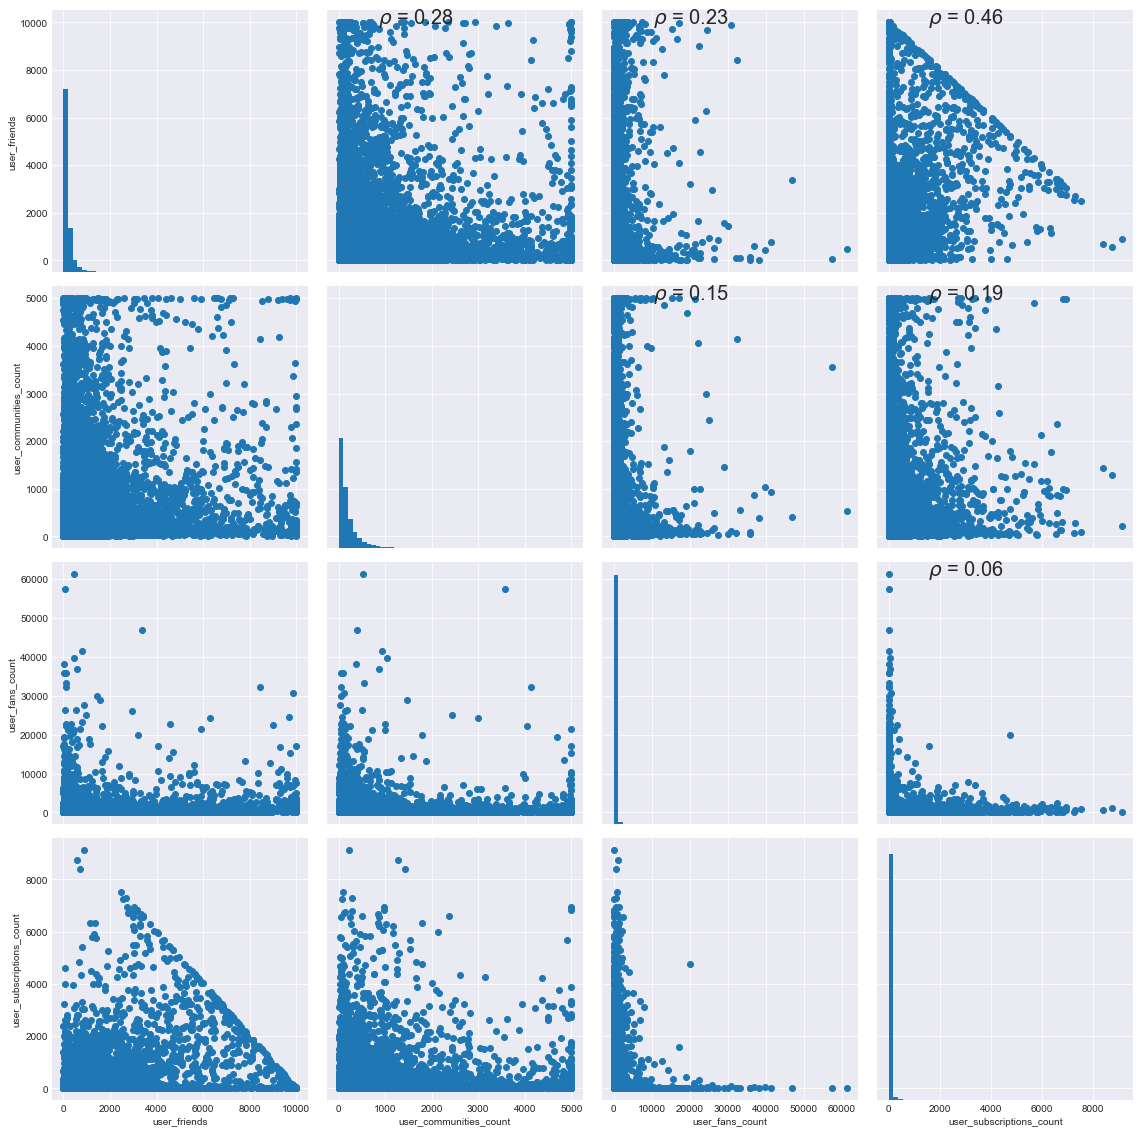

In [18]:
# Возможно, есть корреляции между разными типами заполненности аккаунта, то есть те, у кого больше друзей, 
# также подписаны на бОльшее количество сообществ, на них подписано больше людей и т.д. Проверим это

def corr(x, y, **kwargs):
    '''Коэффициент корреляции (Пирсон): подсчет и создание подписи'''
    
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

    
# Создаем полотно графика
grid = sns.PairGrid(data = df_page_info,
                    vars = ['user_friends', 'user_communities_count', 'user_fans_count', 'user_subscriptions_count'], 
                    size = 4)

# Размещаем графики
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)
grid = grid.map_lower(plt.scatter)
grid = grid.map_diag(plt.hist, bins = 50);

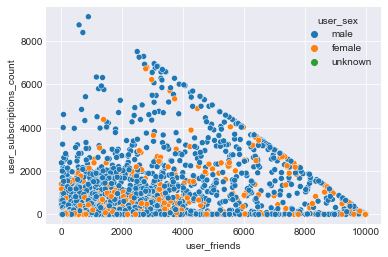

In [19]:
# Умеренная обратная связь наблюдается между переменными "количество друзей" и "количество подписок"
# Добавим в анализ пол пользователя, чтобы проверить наличие или отсутствие этого фактора
sns.scatterplot(data=df_page_info, x='user_friends', y='user_subscriptions_count', hue='user_sex');

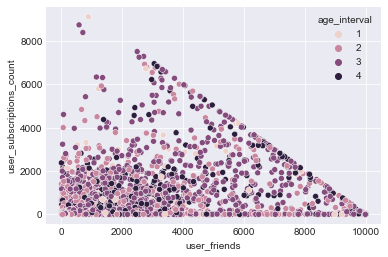

In [20]:
# То же самое для возрастных групп
sns.scatterplot(data=df_page_info, x='user_friends', y='user_subscriptions_count', hue='age_interval');

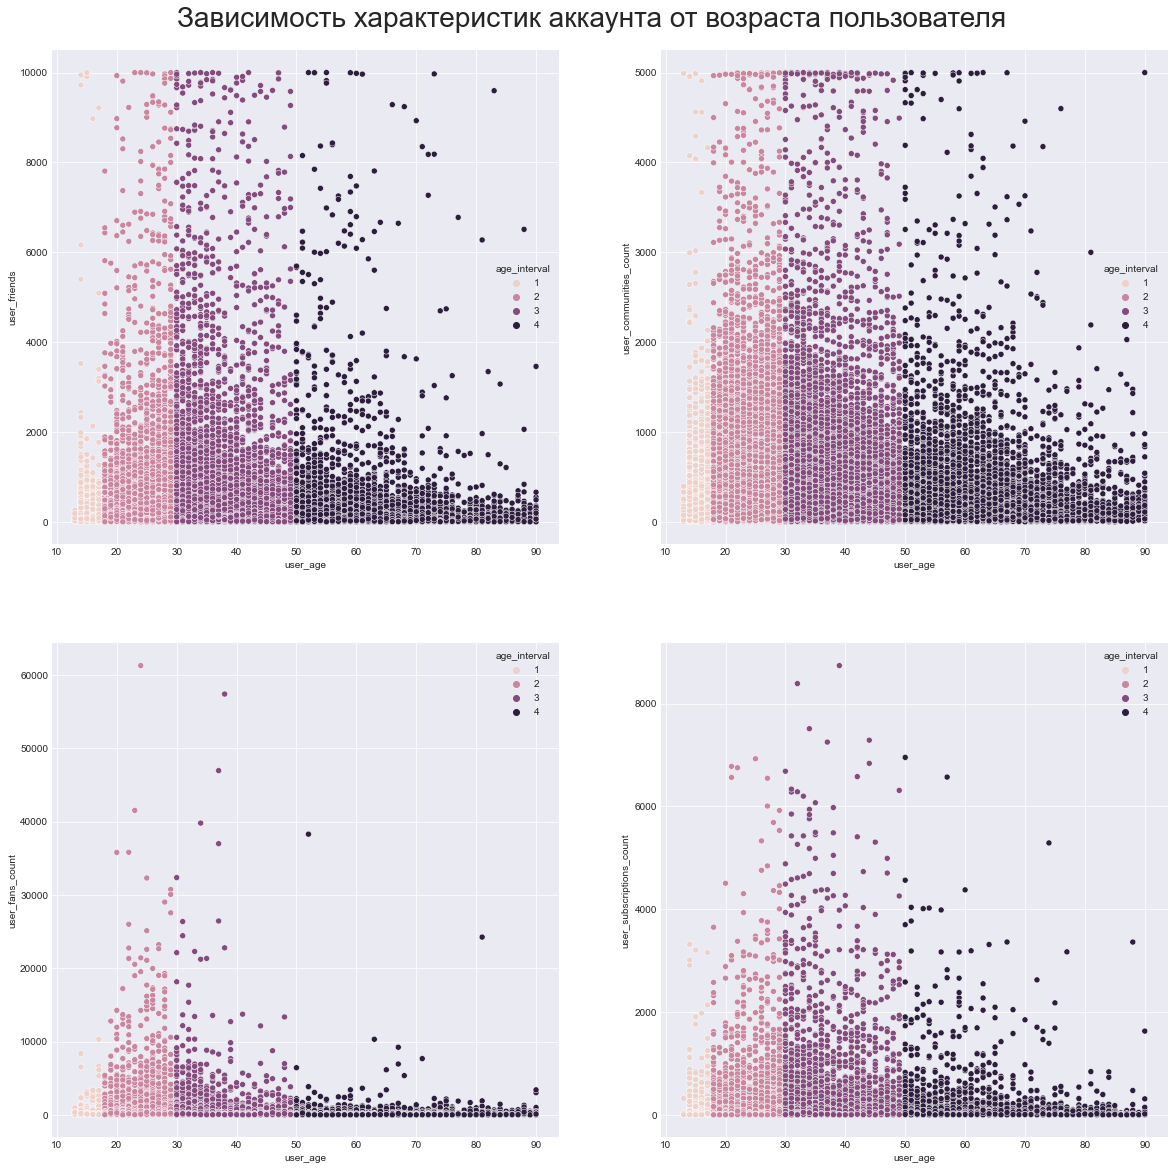

In [21]:
# Посмотрим, зависят ли характеристики аккаунта от возраста пользователя. Построим графики для всех четырех
# характеристик: количества друзей, количества сообществ, количества подписок и количества подписанных на
# пользователя людей

# Задаем сетку графика 2 х 2
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

# Списки для итерации
vars_page_1 = ['user_friends', 'user_communities_count']
vars_page_2 = ['user_fans_count', 'user_subscriptions_count']

# Цикл для первой строки сетки
for i, page in enumerate(vars_page_1):
    # данные
    data = df_page_info[(
        df_page_info['user_age'] >= 7) & (
        df_page_info['user_age'] <= 90)].loc[
        :, ['user_age', 'age_interval', page]]
    # график
    sns.scatterplot(data=data, x='user_age', y=page, hue='age_interval', ax=axs[0][i])

# Цикл для второй строки сетки    
for i, page in enumerate(vars_page_2):
    # данные
    data = df_page_info[(
        df_page_info['user_age'] >= 7) & (
        df_page_info['user_age'] <= 90)].loc[
        :, ['user_age', 'age_interval', page]]
    # график
    sns.scatterplot(data=data, x='user_age', y=page, hue='age_interval', ax=axs[1][i])

# Название графиков    
plt.suptitle('Зависимость характеристик аккаунта от возраста пользователя', y=0.91, size=28);

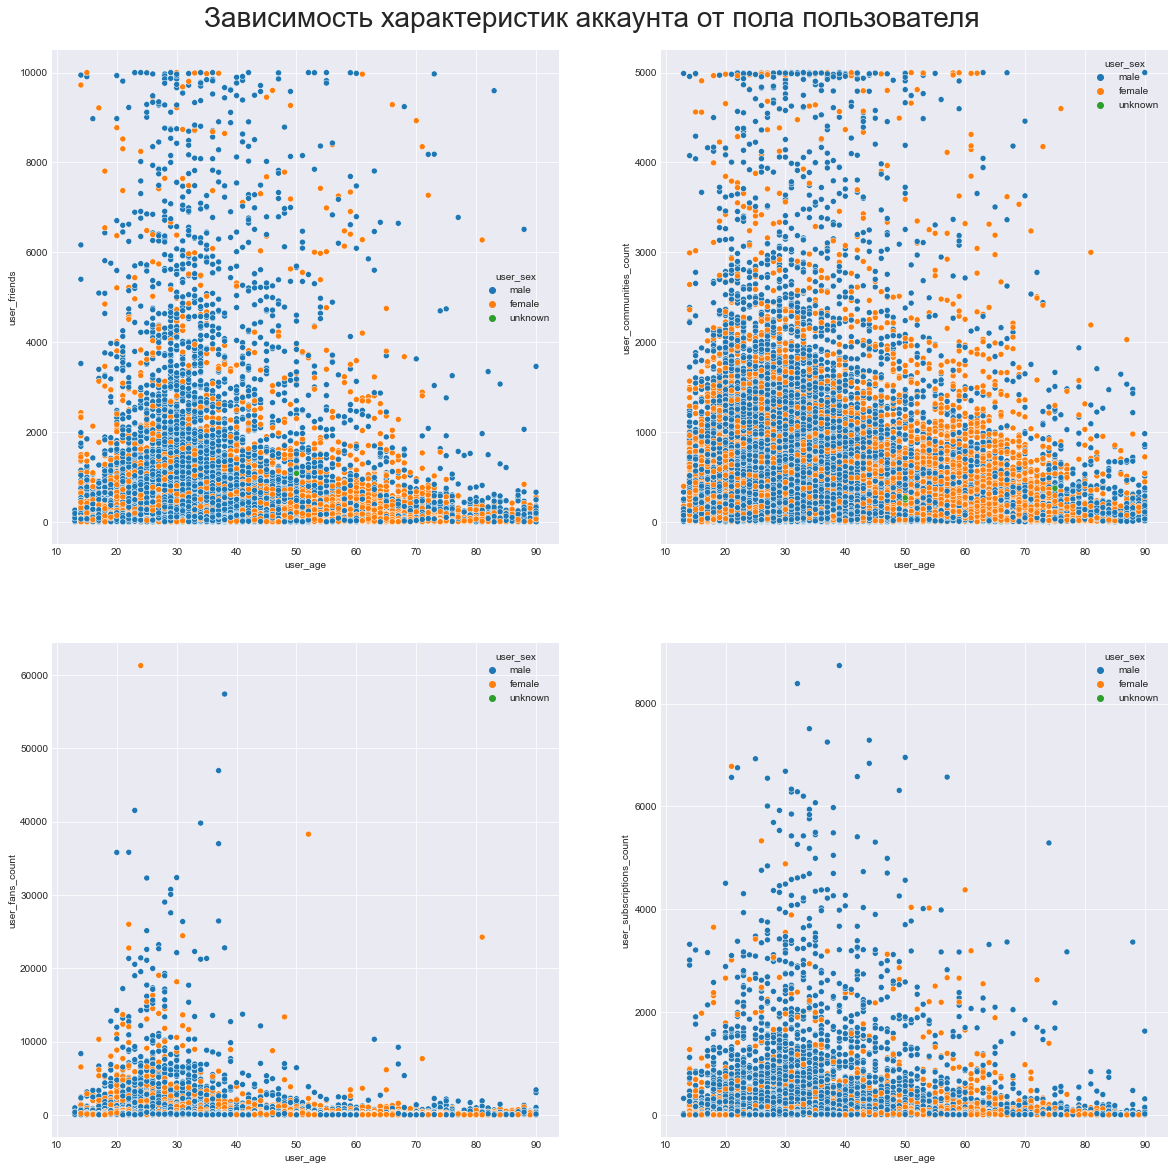

In [22]:
# Проверим, есть ли такая же зависимость от пола

# Задаем сетку графика 2 х 2
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

# Списки для итерации
vars_page_1 = ['user_friends', 'user_communities_count']
vars_page_2 = ['user_fans_count', 'user_subscriptions_count']

# Цикл для первой строки сетки
for i, page in enumerate(vars_page_1):
    # данные
    data = df_page_info[(
        df_page_info['user_age'] >= 7) & (
        df_page_info['user_age'] <= 90)].loc[
        :, ['user_age', 'age_interval', 'user_sex', page]]
    # график
    sns.scatterplot(data=data, x='user_age', y=page, hue='user_sex', ax=axs[0][i])

# Цикл для второй строки сетки    
for i, page in enumerate(vars_page_2):
    # данные
    data = df_page_info[(
        df_page_info['user_age'] >= 7) & (
        df_page_info['user_age'] <= 90)].loc[
        :, ['user_age', 'age_interval', 'user_sex', page]]
    # график
    sns.scatterplot(data=data, x='user_age', y=page, hue='user_sex', ax=axs[1][i])

# Название графиков    
plt.suptitle('Зависимость характеристик аккаунта от пола пользователя', y=0.91, fontsize=28);

#### Выводы по части 3.

1. В целом, **не наблюдается значимой корреляции** между различными характеристиками аккаунта пользователя. То есть гипотеза о том, что более активные пользователи, например, с бОльшим количеством друзей имеют также большее количество подписок или сообществ, не подтверждается. 

2. Однако выявлена **умеренная обратная зависимость между количеством друзей и количеством подписок** (чем меньше друзей, тем больше подписок). Данный факт связан, конечно, со спецификой функционала ВК (пользователя можно добавить в друзья или оставить в подписчиках). Однако наблюдается устойчивая связь: некоторых пользоватлей "стабильно" оставляют в подписчиках, а некоторых "стабильно" добавляют в друзья. Возможно, дополнительный анализ данных пользователей, а именно информация о количестве добавления таких пользователей в черный список (данной информации нет в датасете), могла бы помочь лучше понять данный феномен. 

3. На "полноту" аккаунта (то есть на количество друзей, подписок и пр.) **влияет возраст пользователя**. Так, больше всего друзей и подписок у пользователей из групп **молодежи и людей среднего возраста (18-50 лет)**. При этом тот же параметр детей и подростков и лиц старше 70 лет в разы ниже, чем у первых.

4. Также выявляется, что четвертая возрастная группа (старше 50 лет) на самом деле состоит из двух групп по наполненности аккаунта. **Граница пролегает примерно на отметке 70 лет**. Лица в возрасте 50-70 лет демонстрируют бОльшую "активность" по поиску друзей, подписок на сообщества, на других пользователей и пр. *(При этом необходимо иметь в виду, что часть пользователей наиболее старшего возраста скорее всего являются более молодыми людьми, неверно указавшими свой возраст в аккаунте).*

5. Заметных закономерностей, связанных с наполненностью аккаунта и полом пользователя, не наблюдается. БОльшее преобладание женщин в группах старше 50 лет объясняется их преобладанием в данной возрастной группе в целом.

6. Наибольший разброс значений в переменной "количество людей, подписанных на пользоватлей" (user_fans_count). Это говорит о том, что у бОльшего количества пользователей относительно небольшое количество подписчиков, однако также есть **"звезды" - популярные пользователи с огромным количеством подписчиков**. Большей частью это мужчины в возрасте от 18 до 40 лет.

### Часть 4. Действия пользователей в социальной сети

В данной части попытаемся понять пользовательский опыт: сколько времени проводят в сети различные поло-возрастные группы, чему именно они посвящают время, проведенное ВКонтакте

In [23]:
# Добавим пятую возрастную группу, которую мы выявили ранее (70-90 лет)
bins = np.array([0.0, 18.0, 30.0, 50.0, 70.0])
df['age_interval_5'] = np.digitize(df['user_age'], bins)
df.head()

,hashed_user_id,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,...,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story,age_interval,age_interval_5
0,$1VAQ97BmCCZc,26,male,481,476,361,177,lge,LG-M250,7,...,501,0,55,0,0,0,0,0,2,2
1,$1v/FKogrWnz2,26,female,115,72,419,0,Apple,iPhone 7,7,...,0,0,0,0,0,0,0,0,2,2
2,$1eoMEtyVB3XM,26,female,297,317,2681,0,Apple,iPhone 11 Pro Max,7,...,0,0,0,0,0,0,0,0,2,2
3,$12ZhvNRMpcZU,20,male,147,130,216,0,samsung,SM-G970F,7,...,5085,101,2371,0,0,0,0,0,2,2
4,$1mD0tDgB13tk,39,male,138,311,51,33,NaN,NaN,7,...,1301,0,0,0,0,0,0,0,3,3


In [24]:
# Проанализируем совершаемые пользователями действия

# Создаем датафрейм с действиями
actions_list = ['hashed_user_id', 'user_age', 'user_sex', 'age_interval_5', 
                'timespent_total', 'timespent_im', 'timespent_feed', 
                'timespent_photo', 'timespent_video', 'timespent_clips', 
                'timespent_audio', 'timespent_story']
# (используем исходный датафрейм с дубликатами пользователей, так как действия с разных устройств могут быть 
# разными)
df_actions = df[actions_list]
df_actions.head()

,hashed_user_id,user_age,user_sex,age_interval_5,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
0,$1VAQ97BmCCZc,26,male,2,501,0,55,0,0,0,0,0
1,$1v/FKogrWnz2,26,female,2,0,0,0,0,0,0,0,0
2,$1eoMEtyVB3XM,26,female,2,0,0,0,0,0,0,0,0
3,$12ZhvNRMpcZU,20,male,2,5085,101,2371,0,0,0,0,0
4,$1mD0tDgB13tk,39,male,3,1301,0,0,0,0,0,0,0


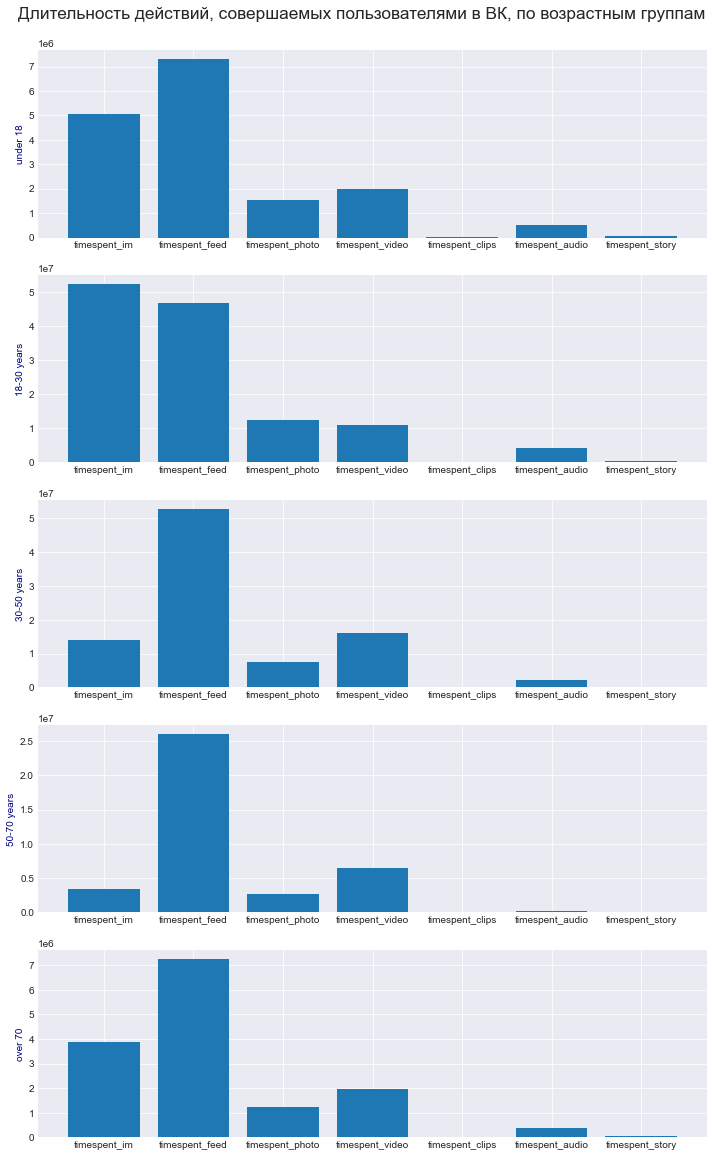

In [25]:
# Посмотрим, сколько времени проводят в ВК представители разных возрастных групп, и что именно они делают

# Словарь для подписи графика
age_groups_labels = {1: 'under 18', 2: '18-30 years', 3: '30-50 years', 4: '50-70 years', 5: 'over 70'}

# Размеры полотна графиков 5 х 1 по количеству групп
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))

# Размещаем графики
for i in range(1, 6):
    data = df_actions[df_actions['age_interval_5'] == i][actions_list[5:]].sum()
    axs[i-1].bar(actions_list[5:], data)
    axs[i-1].set_ylabel(age_groups_labels[i], color='navy')

# Название
plt.suptitle('Длительность действий, совершаемых пользователями в ВК, по возрастным группам'
             , y=0.91, fontsize='xx-large');

In [26]:
# Попробуем выделить какие-нибудь группы пользователей с точки зрения того, как часто они заходят в ВК
# Сначала подготовим датафрейм с количеством входов в соц.сеть в неделю

# Подготовка списка фичей
activity_per_week = ['hashed_user_id', 'user_age', 'user_sex', 'age_interval'
                     , 'days_in_vk_1_week', 'days_in_vk_2_weeks'
                     , 'days_in_vk_4_weeks', 'days_in_vk_8_weeks']
# Сборка датафрейма с нужными столбцами. Дублирующихся пользователей оставим, так как вход может совершаться с 
# разных устройств
df_act_per_week = df.loc[:, activity_per_week]
df_act_per_week.head()

,hashed_user_id,user_age,user_sex,age_interval,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks
0,$1VAQ97BmCCZc,26,male,2,7,14,28,56
1,$1v/FKogrWnz2,26,female,2,7,14,28,56
2,$1eoMEtyVB3XM,26,female,2,7,14,28,56
3,$12ZhvNRMpcZU,20,male,2,7,14,28,56
4,$1mD0tDgB13tk,39,male,3,7,14,28,56


In [27]:
# Посмотрим на основные статистики, сгруппировов данные по полу пользователя
df_act_per_week.groupby('user_sex')[[
    'days_in_vk_1_week', 
    'days_in_vk_2_weeks', 
    'days_in_vk_4_weeks', 
    'days_in_vk_8_weeks']].describe().T

user_sex                        female          male    unknown
days_in_vk_1_week  count  45348.000000  80468.000000  77.000000
                   mean       6.656501      6.681724   5.571429
                   std        0.986091      0.973212   1.673545
                   min        1.000000      1.000000   1.000000
                   25%        7.000000      7.000000   4.000000
                   50%        7.000000      7.000000   6.000000
                   75%        7.000000      7.000000   7.000000
                   max        7.000000      7.000000   7.000000
days_in_vk_2_weeks count  45348.000000  80468.000000  77.000000
                   mean      13.225655     13.261259  10.636364
                   std        2.044297      2.070161   3.575903
                   min        1.000000      1.000000   3.000000
                   25%       14.000000     14.000000   8.000000
                   50%       14.000000     14.000000  12.000000
                   75%       14.000000     14.000000  14.000000
                   max       14.000000     14.000000  14.000000
days_in_vk_4_weeks count  45348.000000  80468.000000  77.000000
                   mean      26.333333     26.369265  20.480519
                   std        4.212128      4.315485   7.814646
                   min        1.000000      1.000000   3.000000
                   25%       27.000000     27.000000  14.000000
                   50%       28.000000     28.000000  23.000000
                   75%       28.000000     28.000000  28.000000
                   max       28.000000     28.000000  28.000000
days_in_vk_8_weeks count  45348.000000  80468.000000  77.000000
                   mean      52.430669     52.387061  39.597403
                   std        8.687940      9.079102  16.436689
                   min        1.000000      1.000000   6.000000
                   25%       54.000000     54.000000  25.000000
                   50%       56.000000     56.000000  46.000000
                   75%       56.000000     56.000000  55.000000
                   max       56.000000     56.000000  56.000000

In [28]:
# Заметных различий между мужчинами и женщинами не наблюдается

# Посмотрим на основные статистики, сгруппировов данные по возрастным группам

# Добавим пятую возрастую группу в новый датафрейм
bins = np.array([0.0, 18.0, 30.0, 50.0, 70.0])
df_act_per_week['age_interval_5'] = np.digitize(df_act_per_week['user_age'], bins)

df_act_per_week.groupby('age_interval_5')[[
    'days_in_vk_1_week', 
    'days_in_vk_2_weeks', 
    'days_in_vk_4_weeks', 
    'days_in_vk_8_weeks']].describe().T

age_interval_5                      1             2             3  \
days_in_vk_1_week  count  7108.000000  61970.000000  34512.000000   
                   mean      6.574142      6.841423      6.564934   
                   std       1.135651      0.709046      1.089228   
                   min       1.000000      1.000000      1.000000   
                   25%       7.000000      7.000000      7.000000   
                   50%       7.000000      7.000000      7.000000   
                   75%       7.000000      7.000000      7.000000   
                   max       7.000000      7.000000      7.000000   
days_in_vk_2_weeks count  7108.000000  61970.000000  34512.000000   
                   mean     13.066545     13.628175     12.996262   
                   std       2.353504      1.515701      2.294117   
                   min       1.000000      1.000000      1.000000   
                   25%      14.000000     14.000000     13.000000   
                   50%      14.000000     14.000000     14.000000   
                   75%      14.000000     14.000000     14.000000   
                   max      14.000000     14.000000     14.000000   
days_in_vk_4_weeks count  7108.000000  61970.000000  34512.000000   
                   mean     26.015898     27.199338     25.780946   
                   std       4.780201      3.133232      4.777983   
                   min       1.000000      1.000000      1.000000   
                   25%      27.000000     28.000000     26.000000   
                   50%      28.000000     28.000000     28.000000   
                   75%      28.000000     28.000000     28.000000   
                   max      28.000000     28.000000     28.000000   
days_in_vk_8_weeks count  7108.000000  61970.000000  34512.000000   
                   mean     51.850732     54.252671     51.068440   
                   std       9.631852      6.544633     10.051550   
                   min       1.000000      1.000000      1.000000   
                   25%      53.000000     56.000000     52.000000   
                   50%      56.000000     56.000000     56.000000   
                   75%      56.000000     56.000000     56.000000   
                   max      56.000000     56.000000     56.000000   

age_interval_5                       4            5  
days_in_vk_1_week  count  15529.000000  6774.000000  
                   mean       6.334085     6.544139  
                   std        1.294103     1.167773  
                   min        1.000000     1.000000  
                   25%        6.000000     7.000000  
                   50%        7.000000     7.000000  
                   75%        7.000000     7.000000  
                   max        7.000000     7.000000  
days_in_vk_2_weeks count  15529.000000  6774.000000  
                   mean      12.492562    12.953056  
                   std        2.670601     2.459027  
                   min        1.000000     1.000000  
                   25%       12.000000    13.000000  
                   50%       14.000000    14.000000  
                   75%       14.000000    14.000000  
                   max       14.000000    14.000000  
days_in_vk_4_weeks count  15529.000000  6774.000000  
                   mean      24.679374    25.710216  
                   std        5.527428     5.077811  
                   min        1.000000     1.000000  
                   25%       24.000000    26.000000  
                   50%       27.000000    28.000000  
                   75%       28.000000    28.000000  
                   max       28.000000    28.000000  
days_in_vk_8_weeks count  15529.000000  6774.000000  
                   mean      48.751755    51.081193  
                   std       11.516581    10.413901  
                   min        1.000000     1.000000  
                   25%       46.000000    52.000000  
                   50%       54.000000    56.000000  
                   75%       56.000000    56.000

In [29]:
# Заметных различий по возрасту также не наблюдается

# Однако видно, что данные сильно смещены вправо (25-й персентиль почти во всех случаях равен максимальному 
# значению или близок к нему)

# Посмотрим на значения, отличающиеся большинства данных (большинство: ежедневное использование ВК)

# Отберем тех, кто использует ВК в среднем не более 4-х раз в неделю
act_per_week_mins = df_act_per_week[
      (df_act_per_week['days_in_vk_1_week'] <= 4) 
    & (df_act_per_week['days_in_vk_2_weeks'] <= 8) 
    & (df_act_per_week['days_in_vk_4_weeks'] <= 16) 
    & (df_act_per_week['days_in_vk_8_weeks'] <= 32)]
act_per_week_mins.describe()

,user_age,age_interval,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,age_interval_5
count,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000
mean,41.961619,2.953883,2.469206,4.146087,7.847664,16.243975,3.042547
std,22.724004,0.939518,1.070028,2.095010,4.405422,9.569700,1.071952
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,2.000000,2.000000,2.000000,4.000000,8.000000,2.000000
50%,38.000000,3.000000,2.000000,4.000000,8.000000,17.000000,3.000000
75%,57.000000,4.000000,3.000000,6.000000,12.000000,24.000000,4.000000
max,120.000000,4.000000,4.000000,8.000000,16.000000,32.000000,5.000000


In [30]:
# Доля пользователей, использующих ВК 4 раза в неделю и реже
len(act_per_week_mins) / len(df_act_per_week)

0.02669727466975924

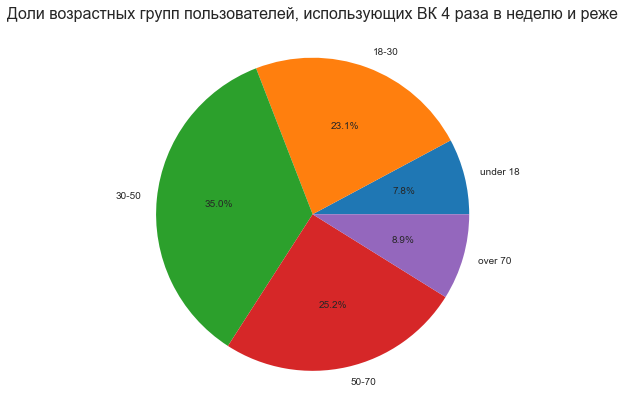

In [31]:
# Распределение получившихся данных уже близко к нормальному
# Посмотрим, в каких группах больше всего пользователей, использующих ВК реже, чем 4 раза в неделю

# данные
act_mins_ = act_per_week_mins.groupby('age_interval_5').count()

# Парамерты для переименования оси х
labels = [0, 1, 2, 3, 4]
age_groups_labels = ['under 18', '18-30 years', '30-50 years', '50-70 years', 'over 70']

# размеры графика
fig, ax = plt.subplots(figsize=(10,6))

# графики и параметры, название
age_groups_labels = ['under 18', '18-30', '30-50', '50-70', 'over 70']
plt.pie(act_mins_['hashed_user_id'], labels=age_groups_labels, autopct='%1.1f%%', radius=1.2)
plt.title('Доли возрастных групп пользователей, использующих ВК 4 раза в неделю и реже', pad=32, fontsize=16);

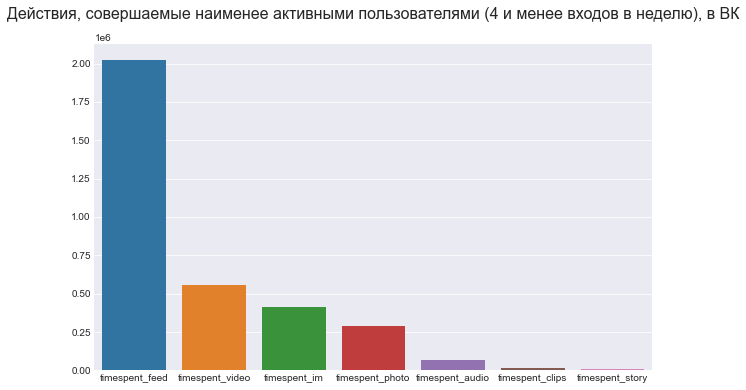

In [32]:
# Посмотрим, на какие именно активности они посвящают время в социальной сети

#Список id таких пользователей для фильтрации
id_of_mins = list(act_per_week_mins['hashed_user_id'])
# Отбор нужных строк
actions_of_mins = df_actions[df_actions['hashed_user_id'].isin(id_of_mins)]
min_user_activity = actions_of_mins[actions_list[5:]].sum().sort_values(ascending=False)

# График и его параментры
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(min_user_activity.index, min_user_activity, ax=ax)
ax.set_title('Действия, совершаемые наименее активными пользователями (4 и менее входов в неделю), в ВК'
             , pad=25, fontsize=16);

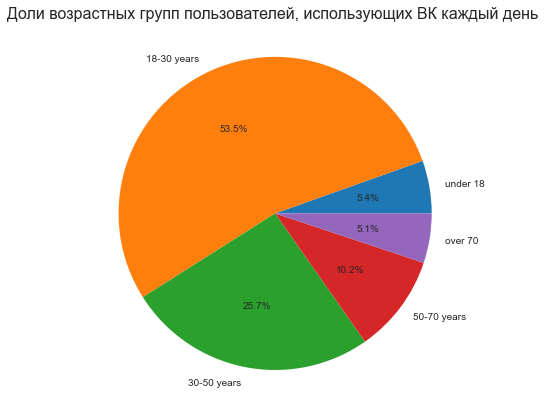

In [33]:
# Теперь посмотрим, как распределены по возрастным группам те, кто заходит в вк каждый день

# данные
act_per_week_usual = df_act_per_week[df_act_per_week['days_in_vk_1_week'] == 7]
act_usuals_ = act_per_week_usual.groupby('age_interval_5').count()

# Парамерты для переименования оси х
labels = [0, 1, 2, 3, 4]
age_groups_labels = ['under 18', '18-30 years', '30-50 years', '50-70 years', 'over 70']

# размеры графика
fig, ax = plt.subplots(figsize=(10,6))

# график и параметры, название
plt.pie(act_usuals_['hashed_user_id'], labels=age_groups_labels, autopct='%1.1f%%', radius=1.2)
plt.title('Доли возрастных групп пользователей, использующих ВК каждый день ', pad=32, fontsize=16);

In [34]:
# Доля таких пользователей
len(act_per_week_usual) / len(df_act_per_week)

0.8546781790885911

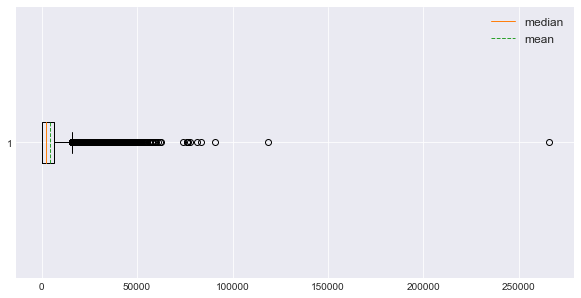

In [35]:
# Попробуем проанализировать еще одну группу пользователей.

# Еще в начале мы выяснили, что распределение переменных, связанных с типами активности, сильно асимметричны и
# имеют длинный правый хвост.

# Посмотрим на распределение переменной timespent_total

# Размеры графика
fig, ax = plt.subplots(figsize=(10,5))

# График и легенда
bp = ax.boxplot(df_actions['timespent_total'], meanline=True, showmeans=True, vert=False)
ax.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'], fontsize='large');

In [36]:
# Попробуем проанализировать правый хвост - в нем сосредоточены пользователи, использующие ВК больше всего

# Используем 75-й персентиль

# Также отфильтруем датафрейм, убрав те строки, где большому значению общего времени соответствуют нули в остальных
# столбцах со временем, так как эти строки не дадут нам информации по необходимым метрикам
top_users = df_actions[
            (df_actions['timespent_total'] > np.percentile(df_actions['timespent_total'], 75))
          & (df_actions['timespent_im'] != 0)
          & (df_actions['timespent_feed'] != 0) 
          & (df_actions['timespent_photo'] != 0) 
          & (df_actions['timespent_video'] != 0) 
          & (df_actions['timespent_clips'] != 0) 
          & (df_actions['timespent_audio'] != 0) 
          & (df_actions['timespent_story'] != 0)
          ]
# Количество таких пользователей
len(top_users)

256

In [37]:
# Доля таких пользователей
len(top_users) / len(df_act_per_week)

0.0020334728698180203

In [38]:
# Выясним, кто эти люди, и построим графики
top_users_sex = top_users.groupby('user_sex')[['hashed_user_id']].count().drop_duplicates()
top_users_age = top_users.groupby('age_interval_5')[['hashed_user_id']].count().drop_duplicates()

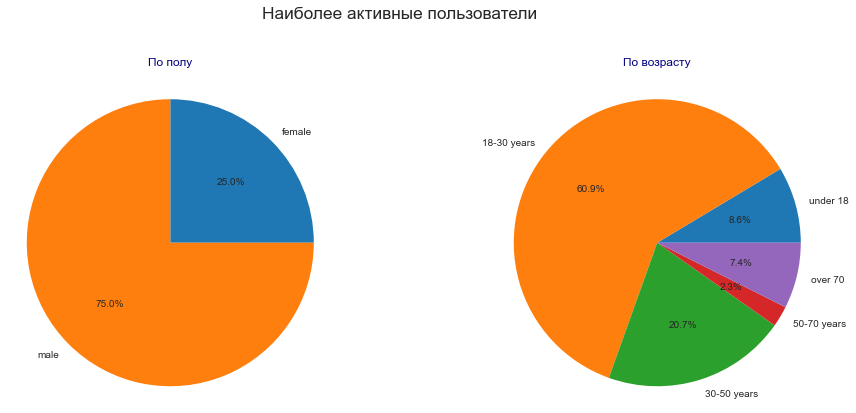

In [39]:
# Размеры графика
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# Первая диаграмма - пол пользователей
sex_groups = ['female', 'male']
axs[0].pie(top_users_sex['hashed_user_id'], labels=sex_groups, autopct='%1.1f%%', radius=1.1)
axs[0].set_title('По полу', pad=15, fontsize=12, color='navy')

# Вторая диаграмма - возрастная группа
age_groups_labels = ['under 18', '18-30 years', '30-50 years', '50-70 years', 'over 70']
axs[1].pie(top_users_age['hashed_user_id'], labels=age_groups_labels, autopct='%1.1f%%', radius=1.1)
axs[1].set_title('По возрасту', pad=15, fontsize=12, color='navy')

# Название
plt.suptitle('Наиболее активные пользователи', y=1.05, fontsize='xx-large');

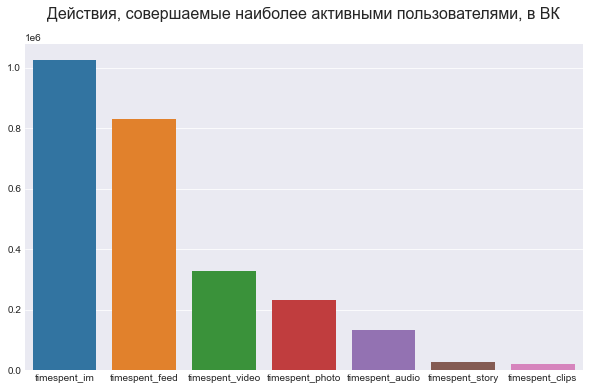

In [40]:
# Выясним, какие действия в ВК они чаще всего совершают
top_user_activity = top_users[actions_list[5:]].sum().sort_values(ascending=False)

# График и параметры
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(top_user_activity.index, top_user_activity, ax=ax)
ax.set_title('Действия, совершаемые наиболее активными пользователями, в ВК', pad=25, fontsize=16);

#### Выводы по части 4

1. Подавляющее большинство (**85,5%**) пользователей *используют ВКонтакте ежедневно*. Каких-либо значимых закономеностей, связанных с возрастом и полом, здесь не прослеживается: представители всех поколений, мужчины и женщины, в большинстве своем заходят в социальную сеть ежедневно. Однако можно отметить, что среди них **более половины - молодежь**, а наименьшую долю составляют наиболее молодые и наиболее пожилые пользователи.

2. Действия, чаще всего совершаемые пользователями, **зависят от возраста**. Так, дети и подростки до 18 лет больше всего времени тратят на чтение ленты и в меньшей степени на переписку. Молодые люди (18-30 лет) много времени тратят на чтение ленты и практически в той же степени на переписку. Люди же более старших поколений (от 30 лет), хотя так же много времени проводят за чтением ленты, на переписку уже затрачивают намного меньше. Также среди представителей этих последних групп популярен просмотр видео.

3. **Около 2,7% пользователей можно назвать неактивными**: это люди, использующие ВК в среднем 4 или менее раз в неделю. В основном это люди **старше 30 лет**, а преобладающий способ времяпреповождения в сети у них - просмотр ленты. Также они просматривают видео, переписываются в мессенджере и просматривают фото, однако суммарное время по пользователям, затраченное на чтение ленты, сильно превосходит всё перечисленное (почти в 4 раза). Возможно, для данной группы ВК не является основной социальной сетью, и в качестве мессенджера они используют другие сервисы

4. Также можно выделить небольшую группу **наиболее активных пользователей**. Данная группа проводит в ВК больше всего времени. В основном это мужчины (75%) в возрасте от 18 до 35 лет (доля этой группы - 60,9%). В отличие от предыдущих групп, больше всего времени они затрачивают на общение в мессенджере, а также чуть в меньше степени на чтение ленты. Остальные виды деятельности представлены меньше: это просмотр видео, фото и прослушивание аудио.

### Общие выводы по работе

1. Значимого влияния на пользовательский опыт пола не выявлено, однако выявлено **влияние возраста** пользователя на то, как именно он использует социальную сеть ВК.

2. Пользователи, которые активнее всего заполняют свои страницы, а именно **добавляют друзей, подписываются на других пользователей или вступают в сообщества, - люди от 18 до 50 лет**. Наименее же активны в этих вопросах самые молодые пользователи: дети и подростки до 18 лет, а также наиболее пожилые - люди старше 70. При этом в анализируемом датасете есть небольшое количество "звезд" - пользователей с наибольшим количеством подписчиков. В основном это мужчины от 18 до 40 лет.

3. Также выявлена **обратная зависимость между количеством друзей и количеством подписок на других пользователей**. Данная зависимость возможна благодаря специфике функционала ВК, которая позволяет пользователю выбрать: оставить кого-то в подписчиках или добавить в друзья. Однако выявленная закономерность говорит о том, что те, кого реже добавляют в друзья, чаще оставляют в подписчиках. Возможен дополнительный анализ пользователей, которых часто "оставляют в подписчиках" и не добавляют в друзья. Возможно, они также чаще других попадают в черные списки пользователей и сообществ *(к сожалению, в датасете не оказалось информации по черным спискам - было бы интересно проверить эту гипотезу)*.

4. **Различия** между молодежью (18-30 лет) и людьми среднего возраста (30-50 лет) прослеживают **в том, как именно пользователи проводят время в ВК**. Дети, подростки и молодые люди практически не пользуются сервисом просмотра видео, фото, аудио. Можно предположить, что данные группы используют для этих целей другие платформы. В то же время пользователи старше 30 лет чаще листают ленту, чем общаются в мессенджере (суммарное время просмотра ленты по пользователям может до 5 раз превышать суммарное время переписки), а также чаще, чем молодые люди, смотрят видео и фото. Это может свидетельствовать о том, что люди более старших поколений воспринимают ВК как место для просмотра новостей, место, где можно следить за жизнью своих друзей, как видеохостинг, и лишь во вторую очередь как пространство для общения.

5. Возрастные **различия также прослеживаются в гаджетах**, которые используются для входа в социальную сеть. Так, в группе молодых людей от 18 до 30 лет превалируют дорогие смартфоны Apple, в то время как в других группах, несмотря на так же лидирующие позиции iPhone'ов, чаще встречаются телефоны более дешевых моделей.

6. Абсолютное большинство пользователей - **85% - заходят в сеть ежедневно**, в то же время есть небольшая группа - **2,7% - людей, которые заходят в ВК 4 и менее раз в неделю**. Судя по тому, что больше всего времени они проводят, просматривая ленту и лишь небольшое время тратят на общение в мессендежере, можно предположить, что ВК для них - не основная социальная сеть. Также можно выделить **наиболее активных пользователей** - тех, кто проводит в ВКонтакте больше всего времени - для них наиболее популярным способом проведения времени в сети является как раз общение в мессенджере, а также чтение ленты. Если говорить о возрастных различиях данных групп, в более активных группах преобладает молодежь, а в менее активных - люди старше 30 лет.

7. Таким образом, основным активным пользователем ВК является молодежь от 18 до 30 лет. Возрастная группа 30-50 лет ведет себя по-разному, является "переходной": в каких-то аспектах (например, количеству друзей, подписок и пр.) она больше похожа на молодежь, а в других (способ времяпреповождения) больше похожа на старшее поколении. То же самое можно сказать о частоте использования ВК: данная группа достаточно широко представлена как в группе использующих ВК ежедневно, так и в группе, использующей ВК 4 раза в неделю и реже.